In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/satishgunjal/datasets/master/admission_basedon_exam_scores.csv')
m, n = df.shape
print('Number of training examples m = ', m)
print('Number of features n = ', n - 1) # Not counting the 'Label: Admission status'
df.sample(5) # Show random 5 training examples

Number of training examples m =  100
Number of features n =  2


,Exam 1 marks,Exam 2 marks,Admission status
72,72.346494,96.227593,1
59,71.796462,78.453562,1
18,70.661510,92.927138,1
82,67.319257,66.589353,1
15,53.971052,89.207350,1


In [3]:
df_admitted = df[df['Admission status'] == 1]
print('Dimension of df_admitted= ', df_admitted.shape)
df_admitted.sample(5)

Dimension of df_admitted=  (60, 3)


,Exam 1 marks,Exam 2 marks,Admission status
19,76.978784,47.575964,1
77,50.458160,75.809860,1
8,76.098787,87.420570,1
12,82.307053,76.481963,1
56,97.645634,68.861573,1


In [4]:
df_notadmitted = df[df['Admission status'] == 0]
print('Dimension of df_notadmitted= ', df_notadmitted.shape)
df_notadmitted.sample(5)

Dimension of df_notadmitted=  (40, 3)


,Exam 1 marks,Exam 2 marks,Admission status
43,82.368754,40.618255,0
34,40.236894,71.167748,0
64,44.668262,66.450086,0
61,35.286113,47.020514,0
53,34.524514,60.396342,0


Text(0.5, 1.0, 'Admitted Vs Not Admitted Applicants')

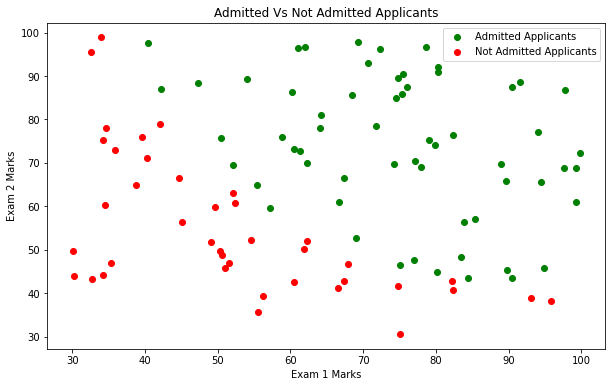

In [5]:
plt.figure(figsize = (10,6))
plt.scatter(df_admitted['Exam 1 marks'], df_admitted['Exam 2 marks'], color='green', label='Admitted Applicants')
plt.scatter(df_notadmitted['Exam 1 marks'], df_notadmitted['Exam 2 marks'], color='red', label='Not Admitted Applicants')
plt.xlabel('Exam 1 Marks')
plt.ylabel('Exam 2 Marks')
plt.legend()
plt.title('Admitted Vs Not Admitted Applicants')

In [6]:
# Get feature columns from dataframe
X = df.iloc[:, 0:2] 
#Add column of ones (intercept term)
X = np.hstack((np.ones((m,1)),X))
# Now X is numpy array of 2 dimension
print("Dimension of feature matric X = ", X.shape, '\n')

y = df.iloc[:, -1]
# First 5 records training examples with labels
for i in range(5):
    print('x =', X[i, ], ', y =', y[i])

Dimension of feature matric X =  (100, 3) 

x = [ 1.         34.62365962 78.02469282] , y = 0
x = [ 1.         30.28671077 43.89499752] , y = 0
x = [ 1.         35.84740877 72.90219803] , y = 0
x = [ 1.         60.18259939 86.3085521 ] , y = 1
x = [ 1.         79.03273605 75.34437644] , y = 1


In [7]:
theta = np.zeros(n)
theta

array([0., 0., 0.])

In [8]:
def sigmoid(z):
    g = 1 / (1 + np.exp(-z))
    return g

In [10]:
def cost_function(theta, X, y):
    m, n = X.shape
    x_dot_theta = X.dot(theta)
    J = 1.0 / m * (-y.T.dot(np.log(sigmoid(x_dot_theta))) - (1 - y).T.dot(np.log(1 - sigmoid(x_dot_theta))))
    return J

In [11]:
def gradient(theta, X, y):
    m, n = X.shape
    x_dot_theta = X.dot(theta)

    grad = 1.0 / m * (sigmoid(x_dot_theta) - y).T.dot(X)

    return grad

In [12]:
cost = cost_function(theta, X, y)
print ('Cost at initial theta (zeros):', cost)

grad = gradient(theta, X, y)
print ('Gradient at initial theta (zeros):', grad)

Cost at initial theta (zeros): 0.6931471805599453
Gradient at initial theta (zeros): [ -0.1        -12.00921659 -11.26284221]


In [13]:
theta, nfeval, rc = opt.fmin_tnc(func=cost_function, fprime= gradient, x0=theta, args=(X, y))
cost = cost_function(theta, X, y)
print ('Cost at theta found by fminunc:', cost)
print ('theta:', theta)

Cost at theta found by fminunc: 0.20349770158947508
theta: [-25.16131853   0.20623159   0.20147149]


Text(0.5, 1.0, 'Decision Boundary')

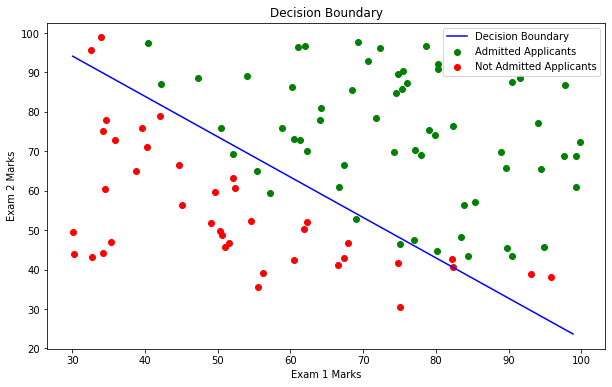

In [14]:
# Lets calculate the X and Y values using Decision Boundary formula

# For ploting a line we just need 2 points. Here I am taking 'min' and 'max' value as my two X points
x_values = [min(X[:, 1]), np.max(X[:, 2])]
y_values = - (theta[0] + np.dot(theta[1], x_values)) / theta[2]

plt.figure(figsize = (10,6))
plt.scatter(df_admitted['Exam 1 marks'], df_admitted['Exam 2 marks'], color='green', label='Admitted Applicants')
plt.scatter(df_notadmitted['Exam 1 marks'], df_notadmitted['Exam 2 marks'], color='red', label='Not Admitted Applicants')
plt.xlabel('Exam 1 Marks')
plt.ylabel('Exam 2 Marks')

plt.plot(x_values, y_values, color='blue', label='Decision Boundary')
plt.legend()
plt.title('Decision Boundary')

In [15]:
input_data = np.array([1, 45, 85]) # Note the intercept term '1' in array
prob = sigmoid(np.dot(input_data, theta))
print ('Admission probability for applicant with scores 45 in Exam 1 and 85 in Exam 2 is =', prob)

Admission probability for applicant with scores 45 in Exam 1 and 85 in Exam 2 is = 0.776290623634958


In [16]:
def predict(theta, X):
    p = sigmoid(X.dot(theta)) >= 0.5
    return p.astype(int)

In [17]:
predictedValue = pd.DataFrame(predict(theta, X), columns=['Predicted Admission status']) # Create new dataframe of column'Predicted Price'
actualAdmissionStatus = pd.DataFrame(y, columns=['Admission status'])
df_actual_vs_predicted = pd.concat([actualAdmissionStatus,predictedValue],axis =1)
df_actual_vs_predicted.T

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Admission status,0,0,0,1,1,0,1,1,1,1,...,1,1,0,1,1,1,1,1,1,1
Predicted Admission status,0,0,0,1,1,0,1,0,1,1,...,1,1,0,1,1,1,1,1,0,1


In [18]:
p = predict(theta, X)
print ('Accuracy:', np.mean(p == y) * 100 )

Accuracy: 89.0
